Example workflow using pycaret, and Jimmy's "utility_forecast_analysis.ipynb"

Author: Hayden Fiege
Date: May 2 2021

In [51]:
import pandas as pd
import numpy as np
from math import log10
import sys
import seaborn as sns
from datetime import datetime



from functools import reduce
import matplotlib.pyplot as plt
%matplotlib notebook
from weather_scrape import *
from electricity_scrape import * 


Import weather_scrape.py and electricity_scrape.py files containing functions to scrape data

In [52]:
# weather params
city = 'yyc'
startdate = '2000-01-01'
enddate = '2020-12-31'
dateformat = '%Y-%m-%d'
contenttype = 'html'
#get raw data into pd dataframe, timeframe = 2 is daily data
weather_yyc_df  =  weather_dl_range(startdate, enddate, dateformat, city, 2, clean=True)
city = 'yeg'
weather_yeg_df  =  weather_dl_range(startdate, enddate, dateformat, city, 2, clean=True)
city = 'ymm'
weather_ymm_df  =  weather_dl_range(startdate, enddate, dateformat, city, 2, clean=True)

Getting data for YYC, station ID 50430
downloading daily data for year 2000
data for year 2000 downloaded
sleep for 7 seconds
downloading daily data for year 2001
data for year 2001 downloaded
sleep for 6 seconds
downloading daily data for year 2002
data for year 2002 downloaded
sleep for 8 seconds
downloading daily data for year 2003
data for year 2003 downloaded
sleep for 7 seconds
downloading daily data for year 2004
data for year 2004 downloaded
sleep for 5 seconds
downloading daily data for year 2005
data for year 2005 downloaded
sleep for 5 seconds
downloading daily data for year 2006
data for year 2006 downloaded
sleep for 8 seconds
downloading daily data for year 2007
data for year 2007 downloaded
sleep for 8 seconds
downloading daily data for year 2008
data for year 2008 downloaded
sleep for 9 seconds
downloading daily data for year 2009
data for year 2009 downloaded
sleep for 4 seconds
downloading daily data for year 2010
data for year 2010 downloaded
sleep for 4 seconds
down

KeyboardInterrupt: 

In [3]:
weather_yyc_df['city'] = 'yyc'
weather_yeg_df['city'] = 'yeg'
weather_ymm_df['city'] = 'ymm'


In [4]:
print('yyc')
print(weather_yyc_df.describe())

print('yeg')
print(weather_yeg_df.describe())

print('ymm')
print(weather_ymm_df.describe())

yyc
              Year        Month          Day  Max Temp (°C)  Min Temp (°C)  \
count  7671.000000  7671.000000  7671.000000    3095.000000    3095.000000   
mean   2010.000000     6.522487    15.730935      11.029176      -0.884152   
std       6.056341     3.449049     8.801214      11.759673      10.072392   
min    2000.000000     1.000000     1.000000     -28.400000     -32.400000   
25%    2005.000000     4.000000     8.000000       3.100000      -7.300000   
50%    2010.000000     7.000000    16.000000      12.100000      -0.100000   
75%    2015.000000    10.000000    23.000000      20.600000       7.650000   
max    2020.000000    12.000000    31.000000      36.500000      17.500000   

       Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  \
count     3095.000000         3095.000000         3095.000000   
mean         5.083393           13.107593            0.190985   
std         10.721472           10.460052            0.731475   
min        -29.800000            

In [5]:
print('yyc')
print(weather_yyc_df.head())

print('yeg')
print(weather_yeg_df.head())

print('ymm')
print(weather_ymm_df.head())

yyc
   Date/Time  Year  Month  Day  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  \
0 2000-01-01  2000      1    1            NaN            NaN             NaN   
1 2000-01-02  2000      1    2            NaN            NaN             NaN   
2 2000-01-03  2000      1    3            NaN            NaN             NaN   
3 2000-01-04  2000      1    4            NaN            NaN             NaN   
4 2000-01-05  2000      1    5            NaN            NaN             NaN   

   Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
0                 NaN                 NaN              0.0              0.0   
1                 NaN                 NaN              0.0              0.0   
2                 NaN                 NaN              0.0              0.0   
3                 NaN                 NaN              0.0              0.0   
4                 NaN                 NaN              0.0              0.0   

   Total Precip (mm)  Snow on Grnd (cm) 

In [19]:
weather_yeg_df.head()

,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),city,datetime
0,2000-01-01,2000,1,1,-10.2,-18.6,-14.4,32.4,0.0,0.0,2.4,2.4,0.0,0.0,yeg,2000-01-01
1,2000-01-02,2000,1,2,-17.1,-20.7,-18.9,36.9,0.0,0.0,0.0,0.0,1.0,0.0,yeg,2000-01-02
2,2000-01-03,2000,1,3,-15.5,-22.2,-18.9,36.9,0.0,0.0,0.0,0.0,1.0,0.0,yeg,2000-01-03
3,2000-01-04,2000,1,4,-12.8,-18.4,-15.6,33.6,0.0,0.0,0.0,0.0,1.0,0.0,yeg,2000-01-04
4,2000-01-05,2000,1,5,-5.1,-14.7,-9.9,27.9,0.0,0.0,1.0,1.0,2.0,0.0,yeg,2000-01-05


In [10]:
weather_df = pd.concat([weather_yyc_df, weather_yeg_df, weather_ymm_df]).groupby(level=0).mean()

In [11]:
weather_df.columns

Index(['Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)'],
      dtype='object')

In [27]:
weather_df['datetime'] = weather_df['Year'].astype(str) + '-' + weather_df['Month'].astype(str) + '-' + weather_df['Day'].astype(str)
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])


In [31]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7671 entries, 0 to 7670
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 7671 non-null   int64         
 1   Year                       7671 non-null   int64         
 2   Month                      7671 non-null   int64         
 3   Day                        7671 non-null   int64         
 4   Max Temp (°C)              7671 non-null   float64       
 5   Min Temp (°C)              7671 non-null   float64       
 6   Mean Temp (°C)             7671 non-null   float64       
 7   Heat Deg Days (°C)         7671 non-null   float64       
 8   Cool Deg Days (°C)         7671 non-null   float64       
 9   Total Rain (mm)            7671 non-null   float64       
 10  Total Snow (cm)            7671 non-null   float64       
 11  Total Precip (mm)          7671 non-null   float64       
 12  Snow o

In [ ]:
weather_df.reset_index()
weather_df.describe

In [14]:
# write to csv to read in
weather_df.to_csv('weather_df.csv')

Run function "aeso_download_range" to scrape electricity daily average pool prices for time range

In [ ]:
#electricity params
tablename = 'DailyAveragePoolPrice'
startdate = '2000-01-01'
enddate = '2020-12-31'
dateformat = '%Y-%m-%d'
contenttype = 'html'
#get table of downloaded data, sort by date
util_prices = aeso_download_range(tablename, contenttype, startdate, enddate, dateformat).sort_values(by='$/MWh_Date').reset_index()

In [ ]:
# write to csv to read in
util_prices.to_csv('util_prices.csv')


In [15]:
# run this to read in csvs instead of needing to re download all the data
util_prices = pd.read_csv('util_prices.csv')
weather_df = pd.read_csv('weather_df.csv')




Join weather data and electricity price data together for analysis

In [35]:
# convert $/MWh_Date to date time
util_prices['$/MWh_Date'] = pd.to_datetime(util_prices['$/MWh_Date'])


In [36]:
unseen_weather_df = weather_df.iloc[6515:]
unseen_util_prices_df = util_prices.iloc[6515:]
train_weather_df = weather_df.iloc[:6514]
train_util_prices_df = util_prices.iloc[:6514]

In [37]:
#join tables together
train_df = train_util_prices_df.merge(train_weather_df, how = 'left', left_on = '$/MWh_Date', right_on = 'datetime')
unseen_df = unseen_util_prices_df.merge(unseen_weather_df, how = 'left', left_on = '$/MWh_Date', right_on = 'datetime')

Pick Daily_Average as the price to analyze (predictor label), and convert to kwh for standard consumer units Define columns used for prediction label, features and timestamp

In [38]:
train_df['Avg_Price_kwh'] = train_df['Daily_Average'] / 1000
train_df = train_df.rename(columns = {'$/MWh_Date':'Date'})

unseen_df['Avg_Price_kwh'] = unseen_df['Daily_Average'] / 1000
unseen_df = unseen_df.rename(columns = {'$/MWh_Date':'Date'})

In [39]:
print(train_df.info())
print(unseen_df.info())

print(train_df.head())
print(unseen_df.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 6513
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0_x               6514 non-null   int64         
 1   index                      6514 non-null   int64         
 2   Date                       6514 non-null   datetime64[ns]
 3   Daily_Average              6514 non-null   float64       
 4   Daily_On Peak Average      6514 non-null   float64       
 5   Daily_Off Peak Average     6514 non-null   float64       
 6   30Ravg_Average             6514 non-null   float64       
 7   30Ravg_On Peak Average     6514 non-null   float64       
 8   30Ravg_Off Peak Average    6514 non-null   float64       
 9   Unnamed: 0_y               6514 non-null   int64         
 10  Year                       6514 non-null   int64         
 11  Month                      6514 non-null   int64         
 12  Day   

In [40]:


train_df = train_df[['Date','Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
            'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)',
            'Dir of Max Gust (10s deg)','Avg_Price_kwh']]
unseen_df = unseen_df[['Date','Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
            'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)',
            'Dir of Max Gust (10s deg)','Avg_Price_kwh']]


In [41]:
dataset = train_df
#check the shape of data
dataset.shape

(6514, 14)

In [42]:

data = dataset
data_unseen = unseen_df


print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (6514, 14)
Unseen Data For Predictions: (1156, 14)


In [124]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Avg_Price_kwh', session_id=1, normalize= True)

,Description,Value
0,session_id,1
1,Target,Avg_Price_kwh
2,Original Data,"(6514, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4559, 31)"


In [125]:
best = compare_models(exclude = ['ransac'])

IntProgress(value=0, description='Processing: ', max=84)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:31:40
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Models
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0368,0.0040,0.0630,0.1572,0.0538,0.7605,0.0840
lightgbm,Light Gradient Boosting Machine,0.0369,0.0040,0.0634,0.1462,0.0543,0.7581,0.0190
ridge,Ridge Regression,0.0388,0.0042,0.0649,0.1088,0.0553,0.8289,0.0040
lr,Linear Regression,0.0388,0.0042,0.0649,0.1087,0.0554,0.8290,0.0050
br,Bayesian Ridge,0.0387,0.0042,0.0649,0.1084,0.0553,0.8274,0.0070
rf,Random Forest Regressor,0.0384,0.0043,0.0651,0.0985,0.0559,0.8070,0.2820
omp,Orthogonal Matching Pursuit,0.0394,0.0044,0.0659,0.0814,0.0562,0.8489,0.0040
et,Extra Trees Regressor,0.0399,0.0046,0.0678,0.0234,0.0582,0.8241,0.2280
huber,Huber Regressor,0.0337,0.0047,0.0681,0.0198,0.0579,0.5214,0.0310
en,Elastic Net,0.0419,0.0048,0.0688,-0.0020,0.0590,0.9918,0.0040


In [126]:
model_selected = "gbr"

In [127]:
model = create_model(model_selected)
 

IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:40:52
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


In [128]:
tuned_model = tune_model(model)


IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:40:58
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished


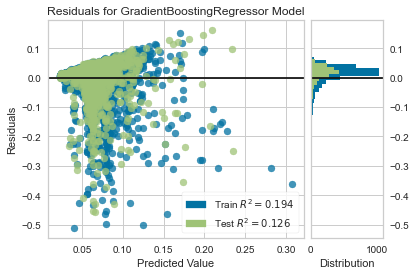

In [129]:
plot_model(tuned_model)

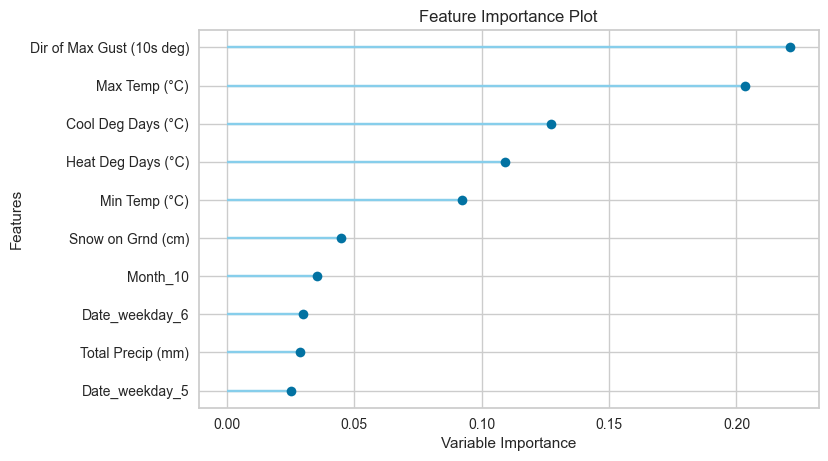

In [130]:
plot_model(tuned_model, plot = 'feature')

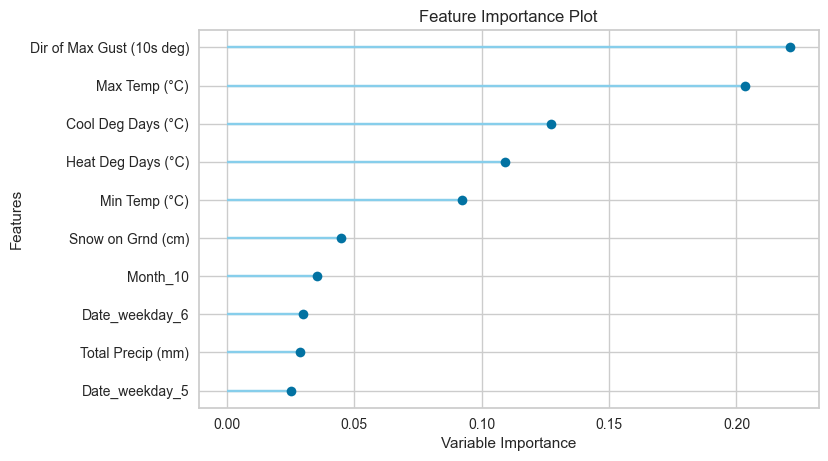

In [131]:
plot_model(tuned_model, plot = 'feature')


In [132]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0376,0.0037,0.0611,0.1260,0.0527,0.8530


,Day,Max Temp (°C),Min Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),...,Date_weekday_1,Date_weekday_2,Date_weekday_3,Date_weekday_4,Date_weekday_5,Date_weekday_6,Date_is_month_end_1,Date_is_month_start_0,Avg_Price_kwh,Label
0,-0.192105,-1.650670,-1.438192,1.595541,-0.264301,-0.22092,-0.191417,-0.332945,1.947799,-0.479304,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.13903,0.065966
1,0.148234,-0.961475,-1.910895,1.445148,-0.264301,-0.22092,-0.191417,-0.332945,-0.475951,-0.479304,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.09622,0.068653
2,0.715465,-1.038943,-0.756408,0.923197,-0.264301,-0.22092,0.424603,-0.160984,1.099486,1.290593,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.02153,0.040267
3,0.602019,0.913774,0.698063,-0.863821,-0.264301,-0.22092,-0.191417,-0.332945,-0.475951,-0.479304,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.02584,0.063139
4,-1.553459,0.881719,1.179857,-1.084987,-0.264301,-0.22092,-0.191417,-0.332945,-0.475951,-0.479304,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.07629,0.063139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,-1.666906,1.643038,1.243490,-1.244226,3.498803,-0.22092,-0.191417,0.225927,-0.475951,-0.479304,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.02879,0.096024
1951,0.942358,0.841649,0.370807,-0.669195,-0.264301,-0.22092,-0.191417,-0.332945,-0.475951,-0.479304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.04962,0.063139
1952,-1.553459,-0.015837,0.279903,-0.147245,-0.264301,-0.22092,-0.191417,-0.332945,1.826611,-0.479304,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.03182,0.060235
1953,-0.305551,-1.274017,-1.601820,1.462841,-0.264301,-0.22092,-0.191417,-0.332945,0.978299,-0.479304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.05072,0.063809


In [133]:

final_model = finalize_model(tuned_model)

In [134]:
unseen_predictions = predict_model(final_model, data=data_unseen)
unseen_predictions.head()

,Date,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Avg_Price_kwh,Label
0,2017-11-02,11,2,-7.200000,-13.133333,-10.200000,28.200000,0.0,0.0,3.0,1.866667,4.0,12.000000,0.02157,0.041684
1,2017-11-03,11,3,-11.466667,-14.766667,-13.166667,31.166667,0.0,0.0,3.3,2.400000,7.0,11.333333,0.02342,0.045265
2,2017-11-04,11,4,-9.200000,-19.133333,-14.166667,32.166667,0.0,0.0,1.1,0.366667,8.5,0.000000,0.03063,0.063436
3,2017-11-05,11,5,-6.233333,-13.500000,-9.900000,27.900000,0.0,0.0,0.2,0.300000,7.5,22.000000,0.02542,0.027058
4,2017-11-06,11,6,-5.400000,-15.566667,-10.533333,28.533333,0.0,0.0,0.0,0.066667,8.5,16.000000,0.02397,0.030359


<AxesSubplot:>

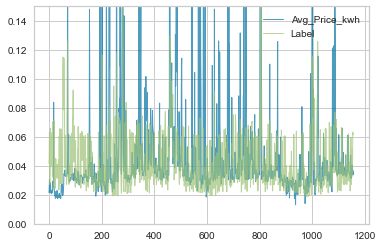

In [135]:
%matplotlib inline
unseen_predictions_label = unseen_predictions[['Avg_Price_kwh','Label']]
unseen_predictions_label.plot(ylim=[0,0.15], linewidth=1, alpha=0.7)

<AxesSubplot:>

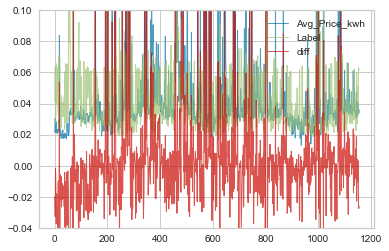

In [137]:
unseen_predictions_label['diff'] = unseen_predictions_label['Avg_Price_kwh'] - unseen_predictions_label['Label']
unseen_predictions_label.plot(ylim=[-0.04,0.10], linewidth=1, alpha=0.7)



In [138]:
from pycaret.utils import check_metric
print(check_metric(unseen_predictions.Avg_Price_kwh, unseen_predictions.Label, 'R2'))
print(check_metric(unseen_predictions.Avg_Price_kwh, unseen_predictions.Label, 'RMSE'))

0.2088
0.0024


In [139]:
save_model(final_model,'Final gbr normalized Model 03May2021Final gbr normalized Model 03May2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='Avg_Price_kwh',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                                            learning_rate=0.05, loss='ls',
                                            max_depth=4, max_features='sqrt',
                                            max_leaf_nodes=None,
                                            min_impurity